In [11]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import bootcamp_utils_code as cdf
import scipy.special
from numpy import copy, sort, amax, arange, exp, sqrt, abs, floor, searchsorted
from scipy.misc import factorial, comb
import itertools

from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette="deep", rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


###PLOT ACTIN ALL SHAPES ANGLES

#load data
df = pd.read_csv('all_shape_actin.csv',comment='#')
df

angle_actin_trianglesb = df.loc[0:39,['Average angle']]
angle_actin_rectanglesb = df.loc[73:113,['Average angle']]
angle_actin_squaresb = df.loc[40:73,['Average angle']]
angle_actin_circlesb = df.loc[115:155,['Average angle']]
angle_actin_controlb = df.loc[114:133,['Average angle']]
angle_actin_control = angle_actin_controlb.iloc[:,0]
angle_actin_triangles = angle_actin_trianglesb.iloc[:,0]
angle_actin_rectangles = angle_actin_rectanglesb.iloc[:,0]
angle_actin_squares = angle_actin_squaresb.iloc[:,0]
angle_actin_circles = angle_actin_circlesb.iloc[:,0]

Unnamed: 0  Average angle  \
0                   MAX_C1-c13 mask1 pdms triangle.png         -70.40   
1                MAX_C1-c7 agarose in PCM triangle.png          84.92   
2                MAX_C1-c6 agarose in PCM triangle.png          10.53   
3                MAX_C1-c8 agarose in PCM triangle.png          64.44   
4                         MAX_C1-fabdgfpc1triangle.png          24.34   
5                         MAX_C1-fabdgfpc3triangle.png          87.55   
6                         MAX_C1-fabdgfpc2triangle.png         -43.11   
7                       MAX_C1-fabd gfptriangle c1.png         -44.26   
8                       MAX_C1-fabd gfptriangle c3.png          77.09   
9                       MAX_C1-fabd gfptriangle c2.png         -42.80   
10                     MAX_C1-fabd-gfp triangle c4.png          27.82   
11                     MAX_C1-fabd-gfp triangle c3.png         -21.31   
12                     MAX_C1-fabd-gfp triangle c2.png           4.93   
13                     MAX_C1-fabd-gfp triangle c1.png          -3.68   
14                     MAX_C1-fabd-gfp triangle c5.png          33.61   
15                      MAX_C1-fabd-gfp triangle 2.png         -59.90   
16                      MAX_C1-fabd-gfp triangle 1.png          59.42   
17                      MAX_C1-fabd-gfp triangle 5.png           3.50   
18                      MAX_C1-fabd-gfp triangle 4.png           1.42   
19                       MAX_C1-fabd gfp triangle1.png         -88.37   
20                      MAX_C1-fabdgfp_triangle_c7.png          58.08   
21                      MAX_C1-fabdgfp_triangle_c6.png         -50.48   
22                      MAX_C1-fabdgfp_triangle_c5.png         -34.63   
23                      MAX_C1-fabdgfp_triangle_c3.png          29.23   
24                      MAX_C1-fabdgfp_triangle_c1.png           9.66   
25                      MAX_C1-fabdgfp_triangle_c8.png          46.22   
26   MAX_C1-fabd gfp overnight digestion trianglec2...           3.99   
27   MAX_C1-fabd gfp overnight digestion trianglec1...         -13.27   
28   MAX_C1-fabd gfp overnight digestion trianglec3...           3.64   
29     MAX_C1-DAY2 OVERNIGHT DIGESTIOn triangle c4.png          16.33   
..                                                 ...            ...   
126       MAX_C1-fabdgfp_embebed_lowmeltagarose_c7.png         -29.76   
127       MAX_C1-fabdgfp_embebed_lowmeltagarose_c6.png         -18.74   
128       MAX_C1-fabdgfp_embebed_lowmeltagarose_c5.png          43.77   
129       MAX_C1-fabdgfp_embebed_lowmeltagarose_c4.png         -73.34   
130       MAX_C1-fabdgfp_embebed_lowmeltagarose_c3.png         -29.53   
131       MAX_C1-fabdgfp_embebed_lowmeltagarose_c2.png         -76.11   
132      MAX_C1-fabdgfp_embebed_lowmeltagarose_c20.png         -31.61   
133      MAX_C1-fabd_gfp_29_1Td_tomato_unshaped_c7.png          34.96   
134                        MAX_C1-fabd gfp circle7.png         -44.88   
135                        MAX_C1-fabd gfp circle6.png          28.43   
136                        MAX_C1-fabd gfp circle5.png         -28.86   
137                        MAX_C1-fabd gfp circle4.png          75.45   
138                        MAX_C1-fabd gfp circle3.png         -15.95   
139                        MAX_C1-fabd gfp circle2.png           3.43   
140                        MAX_C1-fabd gfp circle1.png          42.56   
141                        MAX_C1-fabd gfp circle8.png         -33.92   
142  MAX_C1-c10  plate non imaged on the 15 unshape...          49.85   
143                         MAX_C1-fabdgfp circle3.png          63.60   
144                         MAX_C1-fabdgfp circle4.png         -63.73   
145                MAX_C1-fabd gfp unshapes_circle.png          82.03   
146       MAX_C1-fabdgfp unshaped in square_circle.png         -84.82   
147      MAX_C1-fabdgfp unshaped in square2_circle.png          -5.18   
148                 MAX_C1-fabdgfp unshaped_circle.png           6.91   
149                       MAX

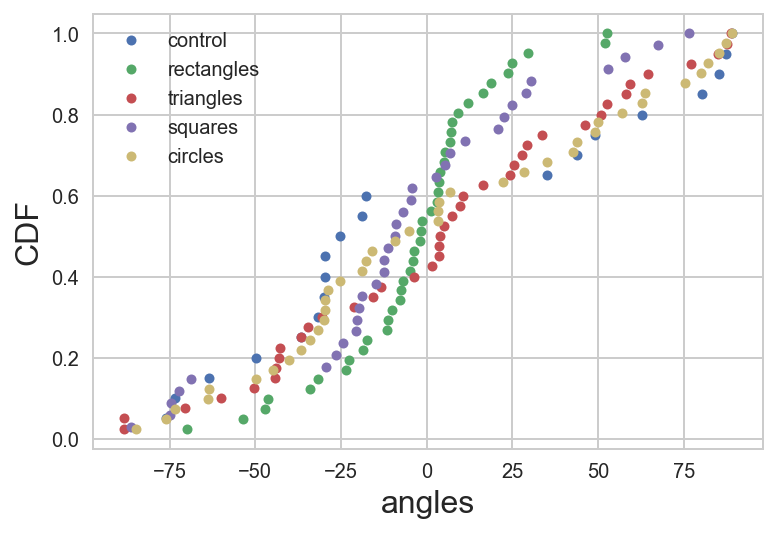

In [2]:
x_angle_actin_control, y_actin_control = cdf.ecdf(angle_actin_control , formal=False)
x_angle_actin_rectangles, y_actin_rectangles = cdf.ecdf(angle_actin_rectangles , formal=False)
x_angle_actin_triangles, y_actin_triangles = cdf.ecdf(angle_actin_triangles , formal=False)
x_angle_actin_squares, y_actin_squares = cdf.ecdf(angle_actin_squares , formal=False)
x_angle_actin_circles, y_actin_circles = cdf.ecdf(angle_actin_circles , formal=False)


# 2. Make smooth curves
x = np.linspace(-90, 90, 100)
cdf_actin_control = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_control), scale=np.std(angle_actin_control))
cdf_actin_circles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_circles), scale=np.std(angle_actin_circles))
cdf_actin_rectangles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_rectangles), scale=np.std(angle_actin_rectangles))
cdf_actin_squares = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_squares), scale=np.std(angle_actin_squares))
cdf_actin_triangles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_triangles), scale=np.std(angle_actin_triangles))


# Set up a figure with set of axes
fig, ax = plt.subplots(1, 1)

# Add axis labels
_ = ax.set_xlabel('angles')
_ = ax.set_ylabel('CDF');


#paint data on the figure plot panel
_ = ax.plot(x_angle_actin_control, y_actin_control, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_rectangles, y_actin_rectangles, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_triangles, y_actin_triangles, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_squares, y_actin_squares, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_circles, y_actin_circles, marker='.', ms=10, linestyle='none')



# Add a legend
plt.legend(('control','rectangles','triangles','squares','circles'), loc='upper left');


#save figure as a pdf
plt.savefig('fig_all_shape_actin_angles_780.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()

In [3]:

###PLOT ACTIN ALL SHAPES anisotropy


angle_actin_trianglesb = df.loc[0:39,['anisotropy']]
angle_actin_rectanglesb = df.loc[73:113,['anisotropy']]
angle_actin_squaresb = df.loc[40:73,['anisotropy']]
angle_actin_circlesb = df.loc[115:155,['anisotropy']]
angle_actin_controlb = df.loc[114:133,['anisotropy']]
angle_actin_control = angle_actin_controlb.iloc[:,0]
angle_actin_triangles = angle_actin_trianglesb.iloc[:,0]
angle_actin_rectangles = angle_actin_rectanglesb.iloc[:,0]
angle_actin_squares = angle_actin_squaresb.iloc[:,0]
angle_actin_circles = angle_actin_circlesb.iloc[:,0]



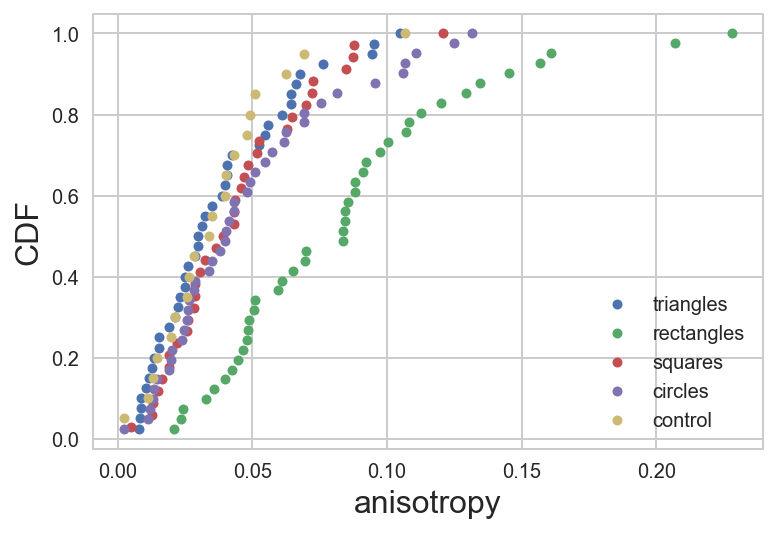

In [4]:

x_angle_actin_triangles, y_actin_triangles = cdf.ecdf(angle_actin_triangles , formal=False)
x_angle_actin_rectangles, y_actin_rectangles = cdf.ecdf(angle_actin_rectangles , formal=False)
x_angle_actin_squares, y_actin_squares = cdf.ecdf(angle_actin_squares , formal=False)
x_angle_actin_circles, y_actin_circles = cdf.ecdf(angle_actin_circles , formal=False)
x_angle_actin_control, y_actin_control = cdf.ecdf(angle_actin_control , formal=False)

# 2. Make smooth curves
x = np.linspace(0, 0.5, 100)
cdf_actin_control = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_control), scale=np.std(angle_actin_control))
cdf_actin_circles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_circles), scale=np.std(angle_actin_circles))
cdf_actin_rectangles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_rectangles), scale=np.std(angle_actin_rectangles))
cdf_actin_squares = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_squares), scale=np.std(angle_actin_squares))
cdf_actin_triangles = scipy.stats.norm.cdf(x, loc=np.mean(angle_actin_triangles), scale=np.std(angle_actin_triangles))


# Set up a figure with set of axes
fig, ax = plt.subplots(1, 1)

# Add axis labels
_ = ax.set_xlabel('anisotropy')
_ = ax.set_ylabel('CDF');


#paint data on the figure plot panel
#_ = ax.plot(cc_iptg, gfp_int, marker='.')
#_ = ax.plot(x_angle_boot_sample, y_boot_sample, marker='.', ms=10, linestyle='none')

_ = ax.plot(x_angle_actin_triangles, y_actin_triangles, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_rectangles, y_actin_rectangles, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_squares, y_actin_squares, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_circles, y_actin_circles, marker='.', ms=10, linestyle='none')
_ = ax.plot(x_angle_actin_control, y_actin_control, marker='.', ms=10, linestyle='none')


# Add a legend
plt.legend(('triangles','rectangles','squares', 'circles','control'), loc='lower right');


#save figure as a pdf
plt.savefig('fig_all_shape_actin_anisotropy_780.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()

In [12]:
#load data
dfact = pd.read_csv('all_shape_actin_columns_orga.csv', comment='#')
list_column_name=list(dfact.columns.values)
dfact

controls  controls.1     rectangles rectangles.1      triangles  \
0   Average angle  anisotropy  Average angle   anisotropy  Average angle   
1           80.17      0.0214         -17.37       0.0881          -70.4   
2          -17.83      0.0351         -11.72       0.0467          84.92   
3          -30.02      0.0399          23.85       0.1608          10.53   
4          -63.62      0.0146           6.77        0.157          64.44   
5          -36.63        0.02          16.43       0.1347          24.34   
6           62.88      0.0285           5.09       0.0244          87.55   
7           49.18      0.0433            3.2       0.0854         -43.11   
8          -49.78       0.051           7.05       0.0359         -44.26   
9          -25.43      0.0691          -7.05       0.1006          77.09   
10          89.17      0.0023           9.03       0.1294          -42.8   
11          85.27      0.0131         -10.08       0.0612          27.82   
12          87.21      0.0258          12.01       0.0839         -21.31   
13         -29.76      0.0493          52.64       0.0924           4.93   
14         -18.74      0.0267          -3.65       0.0696          -3.68   
15          43.77      0.1067          18.64       0.0506          33.61   
16         -73.34      0.0341          -1.36        0.088          -59.9   
17         -29.53      0.0626           2.88        0.048          59.42   
18         -76.11       0.048         -46.42       0.0511            3.5   
19         -31.61      0.0402         -11.29         0.04           1.42   
20          34.96      0.0114          52.09       0.0211         -88.37   
21            NaN         NaN          -1.72       0.0699          58.08   
22            NaN         NaN         -69.93       0.0329         -50.48   
23            NaN         NaN           1.32       0.0597         -34.63   
24            NaN         NaN         -31.69       0.0973          29.23   
25            NaN         NaN          29.56       0.0653           9.66   
26            NaN         NaN           5.39       0.2071          46.22   
27            NaN         NaN           -7.8        0.107           3.99   
28            NaN         NaN         -18.67       0.0912         -13.27   
29            NaN         NaN           3.49       0.2283           3.64   
30            NaN         NaN          -4.87       0.1455          16.33   
31            NaN         NaN           3.79       0.1081         -30.56   
32            NaN         NaN          -4.07       0.0839         -36.77   
33            NaN         NaN         -47.06       0.0236           7.31   
34            NaN         NaN         -23.64       0.0449         -15.74   
35            NaN         NaN           -2.1       0.0845          88.66   
36            NaN         NaN           7.49         0.12          50.84   
37            NaN         NaN         -33.99       0.0489         -88.33   
38            NaN         NaN         -22.75       0.0426          52.71   
39            NaN         NaN         -53.45       0.0845         -44.09   
40            NaN         NaN          -7.57       0.1126          25.33   

   triangles.1        squares   squares.1        circles   circles.1  \
0   anisotropy  Average angle  anisotropy  Average angle  anisotropy   
1       0.0081          11.13      0.0326         -44.88      0.0619   
2       0.0387         -12.33      0.0434          28.43       0.024   
3       0.0249         -18.92      0.0219         -28.86      0.0288   
4         0.03          -14.7      0.0263          75.45       0.106   
5       0.0299          -4.52      0.0305         -15.95      0.0381   
6       0.0945         -20.21      0.0876           3.43      0.0754   
7       0.0261          -4.33      0.0393          42.56      0.0433   
8       0.0546          30.35      0.0721         -33.92      0.1317   
9       0.0424           6.73      0.0284          49.85      0.0135   
10      0.0326         -

[-44.88  28.43 -28.86  75.45 -15.95   3.43  42.56 -33.92  49.85  63.6
 -63.73  82.03 -84.82  -5.18   6.91  22.25  56.91  -9.36   3.34 -40.12
   3.51  80.05]


22

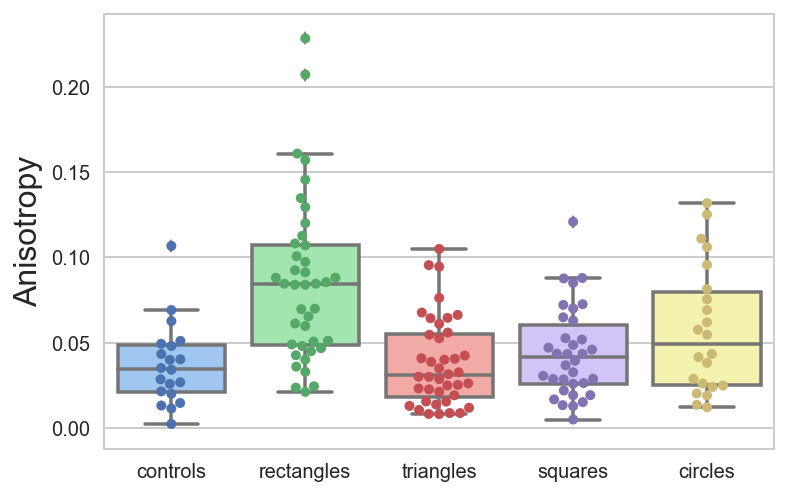

In [6]:
dfact_ani = dfact.iloc[1:,1:10:2]

dfact_ani.columns = ['controls',
 'rectangles',
 'triangles',
 'squares',
 'circles']
dfact_ani
ax = sns.boxplot(data = dfact_ani, palette="pastel")
ax = sns.swarmplot(data = dfact_ani, palette="deep" )
ax.set_ylabel('Anisotropy')

#df2 = df.iloc[1:,16:19]

angles_control = dfact.iloc[1:,8].dropna().unique()
angles_control_fl = angles_control.astype(np.float)

angles_circles = dfact.iloc[1:,6].dropna().unique()
angles_circles_fl = angles_circles.astype(np.float)

angles_squares = dfact.iloc[1:,4].dropna().unique()
angles_squares_fl = angles_squares.astype(np.float)

angles_rectangles = dfact.iloc[1:,2].dropna().unique()
angles_rectangles_fl = angles_rectangles.astype(np.float)

angles_triangles = dfact.iloc[1:,0].dropna().unique()
angles_triangles_fl = angles_triangles.astype(np.float)
print(angles_control_fl)
len(angles_control_fl)
#type(angles_fl)

#angles_rectangles = df.iloc[2:,5].dropna().unique()
#angles_rect_fl = angles_rectangles.astype(np.float)
#print(angles_rect_fl)
#type(angles_rect_fl)


In [7]:
dfact_ani

controls rectangles triangles squares circles
1    0.0214     0.0881    0.0081  0.0326  0.0619
2    0.0351     0.0467    0.0387  0.0434   0.024
3    0.0399     0.1608    0.0249  0.0219  0.0288
4    0.0146      0.157      0.03  0.0263   0.106
5      0.02     0.1347    0.0299  0.0305  0.0381
6    0.0285     0.0244    0.0945  0.0876  0.0754
7    0.0433     0.0854    0.0261  0.0393  0.0433
8     0.051     0.0359    0.0546  0.0721  0.1317
9    0.0691     0.1006    0.0424  0.0284  0.0135
10   0.0023     0.1294    0.0326  0.0259  0.0121
11   0.0131     0.0612    0.0954  0.0725  0.1109
12   0.0258     0.0839     0.061  0.0133   0.019
13   0.0493     0.0924    0.0645    0.07  0.0691
14   0.0267     0.0696    0.0226   0.085  0.0415
15   0.1067     0.0506    0.0155   0.047  0.0956
16   0.0341      0.088    0.0118  0.0288  0.1251
17   0.0626      0.048    0.0559  0.0192  0.0202
18    0.048     0.0511    0.0405  0.0459   0.026
19   0.0402       0.04    0.1049  0.0128  0.0248
20   0.0114     0.0211    0.0191  0.0526  0.0546
21      NaN     0.0699    0.0137  0.0879  0.0814
22      NaN     0.0329    0.0408  0.0518  0.0575
23      NaN     0.0597    0.0762  0.0367     NaN
24      NaN     0.0973    0.0087  0.0648     NaN
25      NaN     0.0653    0.0087  0.0167     NaN
26      NaN     0.2071    0.0082  0.0435     NaN
27      NaN      0.107      0.04  0.0433     NaN
28      NaN     0.0912    0.0286  0.0287     NaN
29      NaN     0.2283    0.0349  0.1208     NaN
30      NaN     0.1455    0.0676  0.0049     NaN
31      NaN     0.1081    0.0231  0.0192     NaN
32      NaN     0.0839    0.0643  0.0151     NaN
33      NaN     0.0236    0.0662  0.0629     NaN
34      NaN     0.0449    0.0525  0.0486     NaN
35      NaN     0.0845    0.0252     NaN     NaN
36      NaN       0.12    0.0129     NaN     NaN
37      NaN     0.0489    0.0105     NaN     NaN
38      NaN     0.0426    0.0154     NaN     NaN
39      NaN     0.0845    0.0315     NaN     NaN
40      NaN     0.1126    0.0212     NaN     NaN

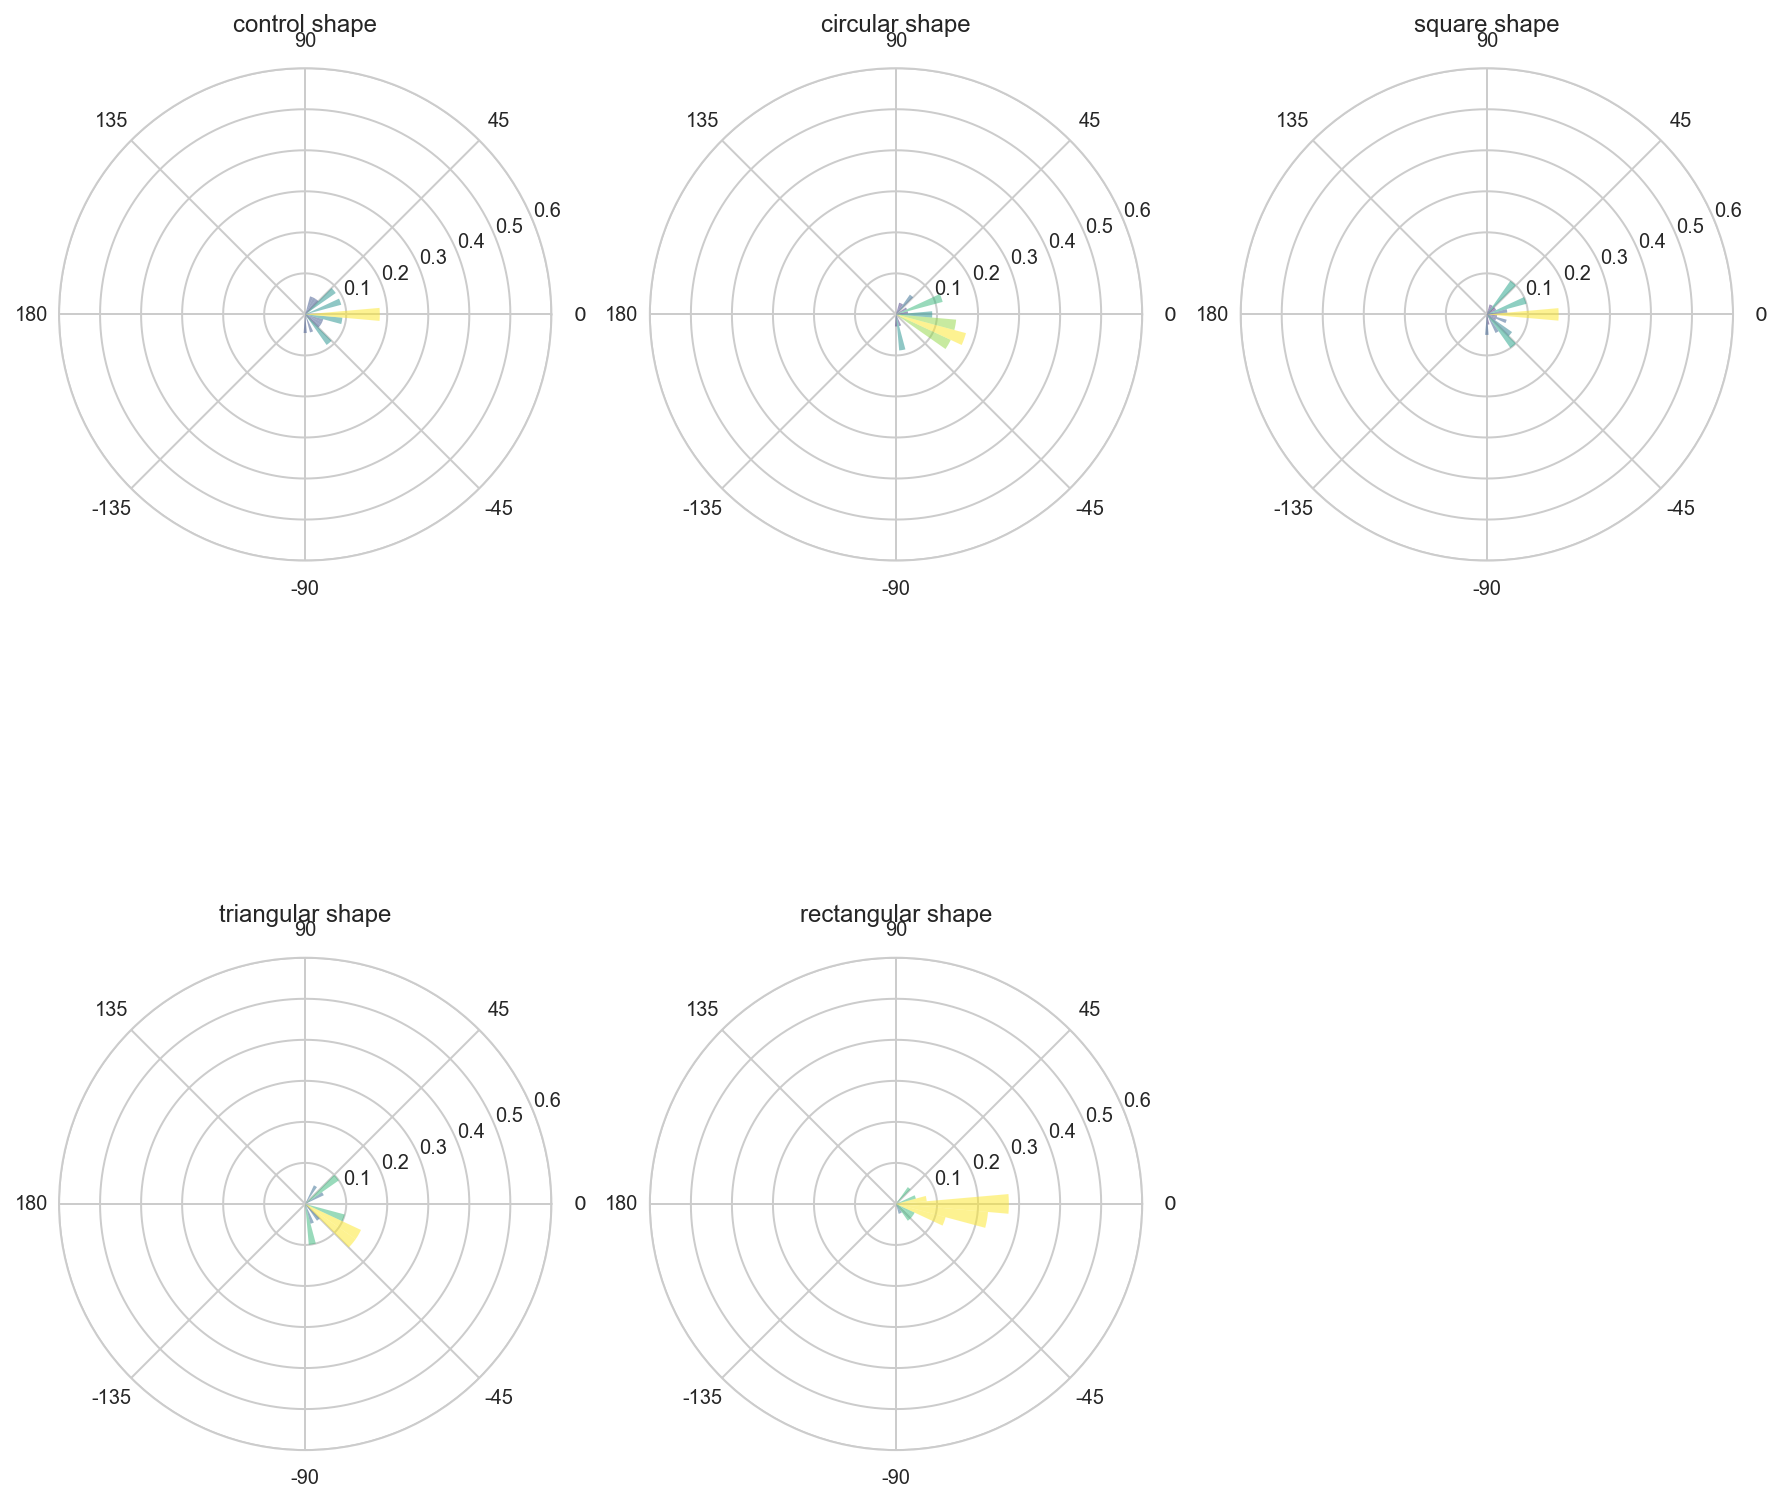

In [8]:
###PLOT actin average angle distrib

bin_test=np.arange(-90, 90, 1)
binning = np.arange(-90,90, 10)

fig, axes = plt.subplots(2, 3,  subplot_kw=dict(polar=True),figsize=(15,15))
#fig.subplots_adjust(hspace=1)

freq_cont, theta = np.histogram(angles_control_fl, 
                           bins=binning)

freq_circ, theta = np.histogram(angles_circles_fl, 
                           bins=binning)

freq_squares, theta = np.histogram(angles_squares_fl, 
                           bins=binning)

freq_triangles, theta = np.histogram(angles_triangles_fl, 
                           bins=binning)

freq_rectangles, theta = np.histogram(angles_rectangles_fl, 
                           bins=binning)

width = np.pi/len(theta)

#first plot control

freq_norm_cont=freq_cont/len(angles_control_fl)
amp = freq_cont.max()*1.

bars_cont=axes[0,0].bar(theta[:-1]*np.pi/180., freq_norm_cont, width=width )#bottom=amp/2)
axes[0,0].set_title("control shape")
axes[0,0].set_ylim([0, 0.6])
                    
for f, bar in zip(freq_cont, bars_cont):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

#axes[0,0].grid(alpha=0.2)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[0,0].set_xticks(angle_pos)
        axes[0,0].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

#second plot circles

freq_norm_circ=freq_circ/len(angles_circles_fl)
amp = freq_circ.max()*1.

bars_circles=axes[0,1].bar(theta[:-1]*np.pi/180., freq_norm_circ, width=width )#bottom=amp/2)
axes[0,1].set_title("circular shape")

axes[0,1].set_ylim([0, 0.6])
for f, bar in zip(freq_circ, bars_circles):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[0,1].set_xticks(angle_pos)
        axes[0,1].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

#axes[0,1].grid(alpha=0.2)
        
#third plot squares


freq_norm_squares=freq_squares/len(angles_squares_fl)
amp = freq_squares.max()*1.

bars_squares=axes[0,2].bar(theta[:-1]*np.pi/180., freq_norm_squares, width=width )#bottom=amp/2)
axes[0,2].set_title("square shape")
axes[0,2].set_ylim([0, 0.6])
for f, bar in zip(freq_squares, bars_squares):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[0,2].set_xticks(angle_pos)
        axes[0,2].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

#axes[0,2].grid(alpha=0.2)
#4th plot triangles


freq_norm_triangles=freq_triangles/len(angles_triangles_fl)
amp = freq_triangles.max()*1.

bars_triangles=axes[1,0].bar(theta[:-1]*np.pi/180., freq_norm_triangles, width=width )#bottom=amp/2)
axes[1,0].set_title("triangular shape")
axes[1,0].set_ylim([0, 0.6])
for f, bar in zip(freq_triangles, bars_triangles):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[1,0].set_xticks(angle_pos)
        axes[1,0].set_xticklabels(angle_label)
else:
        ax.set_xticks([])
#axes[1,0].grid(alpha=0.2)

#5th plot triangles


freq_norm_rectangles=freq_rectangles/len(angles_rectangles_fl)
amp = freq_triangles.max()*1.

bars_rectangles=axes[1,1].bar(theta[:-1]*np.pi/180., freq_norm_rectangles, width=width )#bottom=amp/2)
axes[1,1].set_title("rectangular shape")
axes[1,1].set_ylim([0, 0.6])
for f, bar in zip(freq_rectangles, bars_rectangles):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[1,1].set_xticks(angle_pos)
        axes[1,1].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

#axes[1,1].grid(alpha=0.2)

#delete ax2 from the figure
plt.delaxes(axes[1,2])

        
#print ('bins number = {}'.format(len(freq)))


In [9]:
###KS tests
s_control = np.random.uniform(-90,90,len(angles_control_fl))
stat_control= ks_2samp(angles_control_fl, s_control)


s_circles = np.random.uniform(-90,90,len(angles_circles_fl))
stat_circles= ks_2samp(angles_circles_fl, s_circles)

s_squares = np.random.uniform(-90,90,len(angles_squares_fl))
stat_squares= ks_2samp(angles_squares_fl, s_squares)

s_triangles = np.random.uniform(-90,90,len(angles_triangles_fl))
stat_triangles= ks_2samp(angles_triangles_fl, s_triangles)

s_rectangles = np.random.uniform(-90,90,len(angles_rectangles_fl))
stat_rectangles= ks_2samp(angles_rectangles_fl, s_rectangles)

stat_control




Ks_2sampResult(statistic=0.36363636363636365, pvalue=0.08283450140365015)

In [14]:
control_actin_anisotropy=pd.Series(dfact['controls.1'])
control_actin_anisotropy=control_actin_anisotropy.dropna()

rectangles_actin_anisotropy=pd.Series(dfact['rectangles.1'])
rectangles_actin_anisotropy=rectangles_actin_anisotropy.dropna()
circles_actin_anisotropy=pd.Series(dfact['circles.1'])
circles_actin_anisotropy=circles_actin_anisotropy.dropna()
squares_actin_anisotropy=pd.Series(dfact['squares.1'])
squares_actin_anisotropy=squares_actin_anisotropy.dropna()
triangles_actin_anisotropy=pd.Series(dfact['triangles.1'])
triangles_actin_anisotropy=triangles_actin_anisotropy.dropna()



stat_controls_rectangles_ani = ks_2samp(control_actin_anisotropy,rectangles_actin_anisotropy)
stat_controls_circles_ani = ks_2samp(control_actin_anisotropy,circles_actin_anisotropy)
stat_controls_squares_ani = ks_2samp(control_actin_anisotropy,squares_actin_anisotropy)
stat_controls_triangles_ani = ks_2samp(control_actin_anisotropy,triangles_actin_anisotropy)

stat_controls_rectangles_ani 


Ks_2sampResult(statistic=0.5168408826945412, pvalue=0.0006534042321709807)

In [15]:
###KS test on anisotropy

results_all_stat_ani= [stat_controls_circles_ani,stat_controls_squares_ani,stat_controls_triangles_ani,stat_controls_rectangles_ani]
df_stats_ani = pd.DataFrame(results_all_stat_ani, columns=('stat', 'pvalue'))

df_stats_ani['test_type']= ['KS','KS','KS','KS']
df_stats_ani['shape']= ['circles','squares','triangles','rectangles']
df_stats_ani['N']=[len(circles_actin_anisotropy), len(squares_actin_anisotropy), len(triangles_actin_anisotropy), len(rectangles_actin_anisotropy)]
df_stats_ani

stat    pvalue test_type       shape   N
0  0.331263  0.143080        KS     circles  23
1  0.152381  0.895596        KS     squares  35
2  0.126597  0.969585        KS   triangles  41
3  0.516841  0.000653        KS  rectangles  41

In [16]:
###DEF KUIPER TEST 

def kuiper_FPP(D,N):
    """Compute the false positive probability for the Kuiper statistic.
    Uses the set of four formulas described in Paltani 2004; they report 
    the resulting function never underestimates the false positive probability 
    but can be a bit high in the N=40..50 range. (They quote a factor 1.5 at 
    the 1e-7 level.
    Parameters
    ----------
    D : float
        The Kuiper test score.
    N : float
        The effective sample size.
    Returns
    -------
    fpp : float
        The probability of a score this large arising from the null hypothesis.
    Reference
    ---------
    Paltani, S., "Searching for periods in X-ray observations using 
    Kuiper's test. Application to the ROSAT PSPC archive", Astronomy and
    Astrophysics, v.240, p.789-790, 2004.
    """
    if D<0. or D>2.:
        raise ValueError("Must have 0<=D<=2 by definition of the Kuiper test")

    if D<2./N:
        return 1. - factorial(N)*(D-1./N)**(N-1)
    elif D<3./N:
        k = -(N*D-1.)/2.
        r = sqrt(k**2 - (N*D-2.)/2.)
        a, b = -k+r, -k-r
        return 1. - factorial(N-1)*(b**(N-1.)*(1.-a)-a**(N-1.)*(1.-b))/float(N)**(N-2)*(b-a)
    elif (D>0.5 and N%2==0) or (D>(N-1.)/(2.*N) and N%2==1):
        def T(t):
            y = D+t/float(N)
            return y**(t-3)*(y**3*N-y**2*t*(3.-2./N)/N-t*(t-1)*(t-2)/float(N)**2)
        s = 0.
        # NOTE: the upper limit of this sum is taken from Stephens 1965
        for t in range(int(floor(N*(1-D)))+1):
            term = T(t)*comb(N,t)*(1-D-t/float(N))**(N-t-1)
            s += term
        return s
    else:
        z = D*sqrt(N) 
        S1 = 0.
        term_eps = 1e-12
        abs_eps = 1e-100
        for m in itertools.count(1):
            T1 = 2.*(4.*m**2*z**2-1.)*exp(-2.*m**2*z**2)
            so = S1
            S1 += T1
            if abs(S1-so)/(abs(S1)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        S2 = 0.
        for m in itertools.count(1):
            T2 = m**2*(4.*m**2*z**2-3.)*exp(-2*m**2*z**2)
            so = S2
            S2 += T2
            if abs(S2-so)/(abs(S2)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        return S1 - 8*D/(3.*sqrt(N))*S2

def kuiper(data, cdf=lambda x: x, args=()):
    """Compute the Kuiper statistic.
    
    Use the Kuiper statistic version of the Kolmogorov-Smirnov test to 
    find the probability that something like data was drawn from the 
    distribution whose CDF is given as cdf.
    
    Parameters
    ----------
    data : array-like
        The data values.
    cdf : callable
        A callable to evaluate the CDF of the distribution being tested
        against. Will be called with a vector of all values at once.
    args : list-like, optional
        Additional arguments to be supplied to cdf.
    Returns
    -------
    D : float
        The raw statistic.
    fpp : float
        The probability of a D this large arising with a sample drawn from
        the distribution whose CDF is cdf.
    Notes
    -----
    The Kuiper statistic resembles the Kolmogorov-Smirnov test in that 
    it is nonparametric and invariant under reparameterizations of the data. 
    The Kuiper statistic, in addition, is equally sensitive throughout 
    the domain, and it is also invariant under cyclic permutations (making 
    it particularly appropriate for analyzing circular data). 
    Returns (D, fpp), where D is the Kuiper D number and fpp is the 
    probability that a value as large as D would occur if data was 
    drawn from cdf.
    Warning: The fpp is calculated only approximately, and it can be 
    as much as 1.5 times the true value.
    Stephens 1970 claims this is more effective than the KS at detecting 
    changes in the variance of a distribution; the KS is (he claims) more 
    sensitive at detecting changes in the mean.
    If cdf was obtained from data by fitting, then fpp is not correct and 
    it will be necessary to do Monte Carlo simulations to interpret D. 
    D should normally be independent of the shape of CDF.
    """

    # FIXME: doesn't work for distributions that are actually discrete (for example Poisson).
    data = sort(data)
    cdfv = cdf(data,*args)
    N = len(data)
    D = amax(cdfv-arange(N)/float(N)) + amax((arange(N)+1)/float(N)-cdfv)

    return D, kuiper_FPP(D,N)

def kuiper_two(data1, data2):
    """Compute the Kuiper statistic to compare two samples.
    Parameters
    ----------
    data1 : array-like
        The first set of data values.
    data2 : array-like
        The second set of data values.
    
    Returns
    -------
    D : float
        The raw test statistic.
    fpp : float
        The probability of obtaining two samples this different from
        the same distribution.
    Notes
    -----
    Warning: the fpp is quite approximate, especially for small samples.
    """
    data1, data2 = sort(data1), sort(data2)

    if len(data2)<len(data1):
        data1, data2 = data2, data1

    cdfv1 = searchsorted(data2, data1)/float(len(data2)) # this could be more efficient
    cdfv2 = searchsorted(data1, data2)/float(len(data1)) # this could be more efficient
    D = (amax(cdfv1-arange(len(data1))/float(len(data1))) + 
            amax(cdfv2-arange(len(data2))/float(len(data2))))

    Ne = len(data1)*len(data2)/float(len(data1)+len(data2))
    return D, kuiper_FPP(D, Ne)



def fold_intervals(intervals):
    """Fold the weighted intervals to the interval (0,1).
    Convert a list of intervals (ai, bi, wi) to a list of non-overlapping
    intervals covering (0,1). Each output interval has a weight equal
    to the sum of the wis of all the intervals that include it. All intervals
    are interpreted modulo 1, and weights are accumulated counting 
    multiplicity.
    Parameters
    ----------
    intervals : list of three-element tuples (ai,bi,wi)
        The intervals to fold; ai and bi are the limits of the interval, and
        wi is the weight to apply to the interval.
    Returns
    -------
    breaks : array of floats length N
        The endpoints of a set of intervals covering [0,1]; breaks[0]=0 and
        breaks[-1] = 1
    weights : array of floats of length N-1
        The ith element is the sum of number of times the interval 
        breaks[i],breaks[i+1] is included in each interval times the weight
        associated with that interval.
    """
    r = []
    breaks = set([0,1])
    tot = 0
    for (a,b,wt) in intervals:
        tot += (np.ceil(b)-np.floor(a))*wt
        fa = a%1
        breaks.add(fa)
        r.append((0,fa,-wt))
        fb = b%1
        if fb!=0:
            # If fb==0, no need to trim - but this code would trim
            # [0,1] rather than [1,1]. So trap the special case.
            breaks.add(fb)
            r.append((fb,1,-wt))
        
    breaks = list(breaks)
    breaks.sort()
    breaks_map = dict([(f,i) for (i,f) in enumerate(breaks)])
    totals = np.zeros(len(breaks)-1)
    totals += tot
    for (a,b,wt) in r:
        if a!=b:
            totals[breaks_map[a]:breaks_map[b]]+=wt
    return np.array(breaks), totals

def cdf_from_intervals(breaks, totals):
    """Construct a callable piecewise-linear CDF from a pair of arrays.
    
    Take a pair of arrays in the format returned by fold_intervals and
    make a callable cumulative distribution function on the interval
    (0,1).
    Parameters
    ----------
    breaks : array of floats of length N
        The boundaries of successive intervals.
    weights : array of floats of length N-1
        The weight for each interval.
    Returns
    -------
    f : callable
        A cumulative distribution function corresponding to the 
        piecewise-constant probability distribution given by breaks, weights
    """
    if breaks[0]!=0 or breaks[-1]!=1:
        raise ValueError("Intervals must be restricted to [0,1]")
    if np.any(np.diff(breaks)<=0):
        raise ValueError("Breaks must be strictly increasing")
    if np.any(totals<0):
        raise ValueError("Total weights in each subinterval must be nonnegative")
    if np.all(totals==0):
        raise ValueError("At least one interval must have positive exposure")
    b = breaks.copy()
    c = np.concatenate(((0,), np.cumsum(totals*np.diff(b))))
    c /= c[-1]
    def cdf(x):
        ix = np.searchsorted(b[:-1],x)
        l, r = b[ix-1], b[ix] 
        return ((r-x)*c[ix-1]+(x-l)*c[ix])/(r-l)
    return cdf

def interval_overlap_length(i1,i2):
    """Compute the length of overlap of two intervals.
    
    Parameters
    ----------
    i1, i2 : pairs of two floats
        The two intervals.
    Returns
    -------
    l : float
        The length of the overlap between the two intervals.
    
    """
    (a,b) = i1
    (c,d) = i2
    if a<c:
        if b<c:
            return 0.
        elif b<d:
            return b-c
        else:
            return d-c
    elif a<d:
        if b<d:
            return b-a
        else:
            return d-a
    else:
        return 0

def histogram_intervals(n, breaks, totals):
    """Histogram of a piecewise-constant weight function.
    This function takes a piecewise-constant weight function and 
    computes the average weight in each histogram bin.
    Parameters
    ----------
    n : int
        The number of bins
    breaks : array of floats of length N
        Endpoints of the intervals in the PDF
    totals : array of floats of length N-1
        Probability densities in each bin
    
    Returns
    -------
    h : array of floats
        The average weight for each bin
    """
    h = np.zeros(n)
    start = breaks[0]
    for i in range(len(totals)):
        end = breaks[i+1]
        for j in range(n):
            ol = interval_overlap_length((float(j)/n,float(j+1)/n),(start,end))
            h[j] += ol/(1./n)*totals[i]
        start = end

    return h

In [19]:
### Kuiper test on angles

stat_kuip_cont = kuiper_two(angles_control_fl, s_control)
stat_kuip_circles = kuiper_two(angles_circles_fl, s_circles)
stat_kuip_squares = kuiper_two(angles_squares_fl, s_squares)
stat_kuip_triangles = kuiper_two(angles_triangles_fl, s_triangles)
stat_kuip_rectangles = kuiper_two(angles_rectangles_fl, s_rectangles)

#type(stat_kuip_rectangles)
results_all_stat = [stat_kuip_cont, stat_kuip_circles, stat_kuip_squares, stat_kuip_triangles, stat_kuip_rectangles,stat_control, stat_circles, stat_squares, stat_triangles, stat_rectangles]
df_stats = pd.DataFrame(results_all_stat, columns=('stat', 'pvalue'))

df_stats['test_type']= ['kuiper','kuiper','kuiper','kuiper','kuiper','KS','KS','KS','KS','KS']
df_stats['shape']= ['control','circles','squares','triangles','rectangles','control','circles','squares','triangles','rectangles']
df_stats['N']=[len(angles_control_fl),len(angles_circles_fl) ,len(angles_squares_fl), len(angles_triangles_fl), len(angles_rectangles_fl), len(angles_control_fl),len(angles_circles_fl) ,len(angles_squares_fl), len(angles_triangles_fl), len(angles_rectangles_fl)]
#df_stats_ani['N']=[len(s_control),len(s_control),len(s_control),len(s_control),len(s_control),len(s_control),len(s_control),len(s_control),len(s_control)]
df_stats

/home/pauline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


stat    pvalue test_type       shape   N
0  0.550000  0.043809    kuiper     control  20
1  0.318182  0.707327    kuiper     circles  22
2  0.323529  0.323857    kuiper     squares  34
3  0.225000  0.793646    kuiper   triangles  40
4  0.575000  0.000034    kuiper  rectangles  40
5  0.350000  0.134947        KS     control  20
6  0.318182  0.174600        KS     circles  22
7  0.176471  0.621292        KS     squares  34
8  0.125000  0.893086        KS   triangles  40
9  0.325000  0.022160        KS  rectangles  40